In [76]:
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')

In [77]:
#pd.options.display.f

In [78]:
#Importing NCAA and draft merge data
ncaa_draft_alldata = pd.read_csv('../static/data/ncaa_model_in.csv')
ncaa_draft_alldata.head()

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,Sporting News Player of the Year,UPI Player of the Year,USBWA Freshman of the Year,Year Drafted,Rd,Pk,Tm,Projected Rd,Projected Pk,Team Score
0,Ray Nixon,SR,2006,F,Wisconsin,Big Ten,31,23.548,2.194,5.355,...,0,0,0,0,0,0,NaN,0,0,0
1,Ismaila Njie,FR,2006,C,Florida International,Sun Belt,17,6.059,0.412,1.176,...,0,0,0,0,0,0,NaN,0,0,0
2,Simplice Njoya,SR,2006,F,Memphis,CUSA,10,4.200,0.000,0.400,...,0,0,0,0,0,0,NaN,0,0,0
3,Anthony Noble,SR,2006,G,Stony Brook,AEC,23,7.000,0.783,1.739,...,0,0,0,0,0,0,NaN,0,0,0
4,David Noel,SR,2006,G,North Carolina,ACC,31,33.710,5.097,9.581,...,0,0,0,2006,2,39,MIL,2,39,0


In [79]:
# Cleaning data -- Replacing undrafted players with pick 61 and team to blank
ncaa_draft_alldata['Pk'].replace(0, 61,inplace=True)
ncaa_draft_alldata['Projected Pk'].replace(0, 61,inplace=True)
ncaa_draft_alldata.Tm = ncaa_draft_alldata.Tm.fillna('')
ncaa_draft_alldata.head(8)

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,Sporting News Player of the Year,UPI Player of the Year,USBWA Freshman of the Year,Year Drafted,Rd,Pk,Tm,Projected Rd,Projected Pk,Team Score
0,Ray Nixon,SR,2006,F,Wisconsin,Big Ten,31,23.548,2.194,5.355,...,0,0,0,0,0,61,,0,61,0
1,Ismaila Njie,FR,2006,C,Florida International,Sun Belt,17,6.059,0.412,1.176,...,0,0,0,0,0,61,,0,61,0
2,Simplice Njoya,SR,2006,F,Memphis,CUSA,10,4.200,0.000,0.400,...,0,0,0,0,0,61,,0,61,0
3,Anthony Noble,SR,2006,G,Stony Brook,AEC,23,7.000,0.783,1.739,...,0,0,0,0,0,61,,0,61,0
4,David Noel,SR,2006,G,North Carolina,ACC,31,33.710,5.097,9.581,...,0,0,0,2006,2,39,MIL,2,39,0
5,Londrick Nolen,SR,2006,F,Mississippi,SEC,28,25.107,3.214,7.000,...,0,0,0,0,0,61,,0,61,0
6,Bret Noonan,SR,2006,G,Gardner-Webb,A-Sun,19,5.632,0.632,1.789,...,0,0,0,0,0,61,,0,61,0
7,Steve Novak,SR,2006,F,Marquette,Big East,31,33.774,5.581,11.710,...,0,0,0,2006,2,32,HOU,2,32,0


In [80]:
# number of rows
ncaa_draft_alldata.shape[0]

29368

In [81]:
# deleting rows on PER less than 0 and undrafted 
delete_perlessthan0 = ncaa_draft_alldata[(ncaa_draft_alldata.PER < 0) & (ncaa_draft_alldata.Pk == 61)].index
ncaa_draft_alldata.drop(delete_perlessthan0 , inplace=True)
ncaa_draft_alldata.shape[0]

28307

In [82]:
# deleting rows on PER greater than 50 and undrafted 
delete_pergreaterthan50=ncaa_draft_alldata[(ncaa_draft_alldata.PER > 40) & (ncaa_draft_alldata.Pk == 61)].index
ncaa_draft_alldata.drop(delete_pergreaterthan50 , inplace=True)
ncaa_draft_alldata.shape[0]

28099

In [83]:
ncaa_draft_alldata.head(8)

,Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,...,Sporting News Player of the Year,UPI Player of the Year,USBWA Freshman of the Year,Year Drafted,Rd,Pk,Tm,Projected Rd,Projected Pk,Team Score
0,Ray Nixon,SR,2006,F,Wisconsin,Big Ten,31,23.548,2.194,5.355,...,0,0,0,0,0,61,,0,61,0
1,Ismaila Njie,FR,2006,C,Florida International,Sun Belt,17,6.059,0.412,1.176,...,0,0,0,0,0,61,,0,61,0
2,Simplice Njoya,SR,2006,F,Memphis,CUSA,10,4.200,0.000,0.400,...,0,0,0,0,0,61,,0,61,0
3,Anthony Noble,SR,2006,G,Stony Brook,AEC,23,7.000,0.783,1.739,...,0,0,0,0,0,61,,0,61,0
4,David Noel,SR,2006,G,North Carolina,ACC,31,33.710,5.097,9.581,...,0,0,0,2006,2,39,MIL,2,39,0
5,Londrick Nolen,SR,2006,F,Mississippi,SEC,28,25.107,3.214,7.000,...,0,0,0,0,0,61,,0,61,0
6,Bret Noonan,SR,2006,G,Gardner-Webb,A-Sun,19,5.632,0.632,1.789,...,0,0,0,0,0,61,,0,61,0
7,Steve Novak,SR,2006,F,Marquette,Big East,31,33.774,5.581,11.710,...,0,0,0,2006,2,32,HOU,2,32,0


Modeling


In [84]:
#columns:
#Player,Class,Season,Pos,School,Conf,G,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,
#TOV,PF,PTS,PER,eFG%,WS,AP Player of the Year,NABC Defensive Player of the Year,NABC Player of the Year,
#Naismith Award,NCAA Tournament Most Outstanding Player,NIT Most Valuable Player,Rupp Trophy,
#Sporting News Player of the Year,UPI Player of the Year,USBWA Freshman of the Year,Year Drafted,Rd,Pk,Tm,,Projected Pk,Team Score

In [85]:
#features  33
#G,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,
#TOV,PF,PTS,PER,eFG%,WS,AP Player of the Year,NABC Defensive Player of the Year,NABC Player of the Year,
#Naismith Award,NCAA Tournament Most Outstanding Player,NIT Most Valuable Player,Rupp Trophy,
#Sporting News Player of the Year,UPI Player of the Year,USBWA Freshman of the Year,Pk

In [86]:
ncaa_draft_alldata = ncaa_draft_alldata[(ncaa_draft_alldata.Pk !=61)]

In [87]:
ncaa_draft_data_19992005 = ncaa_draft_alldata[(ncaa_draft_alldata.Season >= 1999) & (ncaa_draft_alldata.Season < 2005)]

In [88]:
ncaa_draft_data = ncaa_draft_alldata[(ncaa_draft_alldata.Season >= 2005) & (ncaa_draft_alldata.Season < 2016)]

In [89]:
ncaa_draft_data20162019 = ncaa_draft_alldata[(ncaa_draft_alldata.Season >= 2016) & (ncaa_draft_alldata.Season < 2020)]

In [90]:
ncaa_draft_data_19992005.shape[0]

0

In [91]:
ncaa_draft_data.shape[0]

393

In [92]:
ncaa_draft_data20162019.shape[0]

173

In [93]:
#features and target
features = ncaa_draft_data.drop(['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Tm','Projected Pk','Team Score','Pk'],1)
target = ncaa_draft_data['Pk']

In [94]:
features.columns

Index(['G', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'eFG%',
       'WS', 'AP Player of the Year', 'NABC Defensive Player of the Year',
       'NABC Player of the Year', 'Naismith Award',
       'NCAA Tournament Most Outstanding Player', 'NIT Most Valuable Player',
       'Rupp Trophy', 'Sporting News Player of the Year',
       'UPI Player of the Year', 'USBWA Freshman of the Year', 'Projected Rd'],
      dtype='object')

In [95]:
#split training and testing data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.40)

In [96]:
#standardize the features
scaler = preprocessing.StandardScaler().fit(features_train)
scaler.transform(features_train)
scaler.transform(features_test)

array([[-3.40630283e-01, -2.56198912e+00, -1.28836456e+00, ...,
         0.00000000e+00, -1.13714707e-01, -8.60662966e-01],
       [-3.18257525e+00, -2.01419040e-01, -3.62732991e-01, ...,
         0.00000000e+00, -1.13714707e-01,  1.16189500e+00],
       [ 1.33027211e-01,  1.08318287e+00,  5.68963324e-01, ...,
         0.00000000e+00, -1.13714707e-01,  1.16189500e+00],
       ...,
       [-1.03801536e-01,  3.26892078e-03, -4.77205036e-01, ...,
         0.00000000e+00, -1.13714707e-01,  1.16189500e+00],
       [-4.60354774e+00,  3.64555503e-01, -8.60800102e-01, ...,
         0.00000000e+00, -1.13714707e-01, -8.60662966e-01],
       [-1.05111653e+00, -1.36806696e-01,  3.77165792e-01, ...,
         0.00000000e+00, -1.13714707e-01, -8.60662966e-01]])

In [97]:
#Fit model by a multi-layer perceptron neural network using lbfgs optimization
model_MLP = MLPRegressor(hidden_layer_sizes = (33,), activation='identity', solver='lbfgs', alpha = 0.005, max_iter = 500, shuffle=True)
model_MLP.fit(features_train, target_train)

MLPRegressor(activation='identity', alpha=0.005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(33,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [98]:
#Fit model by a multi-layer perceptron neural network using lbfgs optimization
model_MLP = MLPRegressor(hidden_layer_sizes = (32,), activation='identity', solver='adam', alpha = 0.001, max_iter = 1000, shuffle=True)
model_MLP.fit(features_train, target_train)

MLPRegressor(activation='identity', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

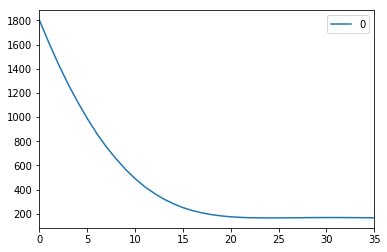

In [99]:
pd.DataFrame(model_MLP.loss_curve_).plot()

In [100]:
#MSEMLP = mean_squared_error(y_true, y_predict)

In [101]:
#Fit a model by Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
#Fit a model by a linear SVR
model_SVR = SVR(kernel = 'linear')
model_SVR.fit(features_train, target_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
#Fit a model by Lasso Regression
model_lasso = linear_model.Lasso()
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
#Fit model by linear regression
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
print(model_LR.intercept_)
print(model_LR.coef_)

49.3327782081262
[-2.19299738e-02 -8.49360984e-01 -1.84242045e+03 -5.06513885e+02
  1.10868482e+03  5.05603902e+02  7.46426746e+02  5.03683400e+02
 -3.69142676e+02  9.51748012e-01  2.41300057e+03  2.41035914e+03
 -2.40997712e+03  2.02356997e+00  2.17784242e+00 -3.55854104e-01
 -6.34358818e+00 -5.77274055e-01  3.69864052e+02 -1.46598128e+00
 -4.36920789e+01 -4.44477237e-01 -1.86817688e+00 -6.78648699e+00
 -4.70781783e+00 -1.86817688e+00  3.11474615e+00  4.17974448e+00
  7.74797954e-01  7.74797954e-01  0.00000000e+00 -6.60392690e+00
  2.76353809e+01]


In [105]:
#Predict target on testing data
target_pred_MLP = model_MLP.predict(features_test)
target_pred_LR = model_LR.predict(features_test)
target_pred_ridge = model_ridge.predict(features_test)
target_pred_SVR = model_SVR.predict(features_test)
target_pred_lasso = model_lasso.predict(features_test)

In [106]:
#Importing NCAA and draft merge data
nba_draft_data = ncaa_draft_data20162019
pro_features = nba_draft_data.drop(['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Tm','Projected Pk','Team Score','Pk'], 1)
scaler.transform(pro_features)

array([[-0.10380154,  0.22102732, -0.76679657, ...,  0.        ,
        -0.11371471,  1.161895  ],
       [-0.81428778, -1.51438134, -0.69477773, ...,  0.        ,
        -0.11371471,  1.161895  ],
       [ 0.36985596,  1.10291183,  1.09356369, ...,  0.        ,
        -0.11371471, -0.86066297],
       ...,
       [ 0.60668471, -0.13138123,  1.58935652, ...,  0.        ,
        -0.11371471, -0.86066297],
       [ 0.84351345,  1.15248085, -0.09436806, ...,  0.        ,
        -0.11371471,  1.161895  ],
       [-6.97183521, -0.7205373 ,  0.35214872, ...,  0.        ,
        -0.11371471, -0.86066297]])

In [107]:
#Using the multi-layer perceptron neural network model to predict current prospects
MLPPrediction = model_MLP.predict(pro_features)
nba_draft_data['Projected Pk'] = MLPPrediction
nba_draft_data['Projected Pk'] = nba_draft_data['Projected Pk'].round()
MLPResults = nba_draft_data[['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Pk','Tm','Projected Pk']]
MLPResults.head(8)
mlpdiff = MLPResults[(MLPResults['Pk'] != MLPResults['Projected Pk'])]
mlpdiff.head()
mlpdiff.shape[0]

170

In [108]:
#Using the Linear regression perceptron neural network model to predict current prospects
LRPrediction = model_LR.predict(pro_features)
nba_draft_data['Projected Pk'] = LRPrediction
nba_draft_data['Projected Pk'] = nba_draft_data['Projected Pk'].round()
LRResults = nba_draft_data[['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Pk','Tm','Projected Pk']]
lrdiff = LRResults[(LRResults['Pk'] != LRResults['Projected Pk'])]
lrdiff.shape[0]


168

In [109]:
#Using the Ridge perceptron neural network model to predict current prospects
RidgePrediction = model_ridge.predict(pro_features)
nba_draft_data['Projected Pk'] = RidgePrediction
nba_draft_data['Projected Pk'] = nba_draft_data['Projected Pk'].round()
RidgeResults = nba_draft_data[['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Pk','Tm','Projected Pk']]
ridgediff = RidgeResults[(LRResults['Pk'] != RidgeResults['Projected Pk'])]
ridgediff.shape[0]


168

In [110]:
#Using the lasso perceptron neural network model to predict current prospects
lassoPrediction = model_lasso.predict(pro_features)
nba_draft_data['Projected Pk'] = lassoPrediction
nba_draft_data['Projected Pk'] = nba_draft_data['Projected Pk'].round()
lassoResults = nba_draft_data[['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Pk','Tm','Projected Pk']]
lassodiff = lassoResults[(lassoResults['Pk'] != lassoResults['Projected Pk'])]
lassodiff.shape[0]


164

In [111]:
#Using the SVR perceptron neural network model to predict current prospects
SVRPrediction = model_SVR.predict(pro_features)
nba_draft_data['Projected Pk'] = SVRPrediction
nba_draft_data['Projected Pk'] = nba_draft_data['Projected Pk'].round()
SVRResults = nba_draft_data[['Player','Class','Season','Pos','School','Conf','Year Drafted','Rd','Pk','Tm','Projected Pk']]
svrdiff = SVRResults[(SVRResults['Pk'] != SVRResults['Projected Pk'])]
svrdiff.shape[0]

166

In [112]:
MLPResults.to_csv('../static/data/MLPpredictions.csv')

In [113]:
LRResults.to_csv('../static/data/LRpredictions.csv')

In [114]:
RidgeResults.to_csv('../static/data/Ridgepredictions.csv')

In [115]:
lassoResults.to_csv('../static/data/Lassopredictions.csv')

In [116]:
SVRResults.to_csv('../static/data/SVRpredictions.csv')